<a href="https://colab.research.google.com/github/SowjanyaKiran/Tiger_Drone_Art_SkyMap/blob/main/Image_To_Text_and_Text_To_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(100.0, 50.0)


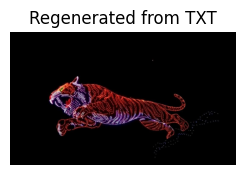

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Load original image

# ---- Later: Read back from txt ----
# Read pixel values

# Specify the filename directly
filename = "/content/image_pixels.txt" # Replace with the actual filename
import numpy as np

# Suppose top-left pixel corresponds to (0.0, 0.0)
# and each pixel = 0.5 meters apart
x_origin, y_origin = 0.0, 0.0
pixel_size = 0.5  # meters per pixel

def pixel_to_world(col, row):
    x = x_origin + col * pixel_size
    y = y_origin + row * pixel_size
    return x, y

print(pixel_to_world(200, 100))
data1=filename
datavalues = np.loadtxt(data1, dtype=np.uint8)
# Use the correct dimensions from the previous cell's output (zr6eogpJ9ww0)
height=630
width=1067
channels=3
# Reshape back to original dimensions
regenerated = datavalues.reshape(height, width, channels)

# Show original vs regenerated

plt.subplot(1, 2, 2)
plt.title("Regenerated from TXT")
plt.imshow(regenerated)
plt.axis("off")

plt.show()

Pixel data saved to image_pixels.txt
630 1067 3


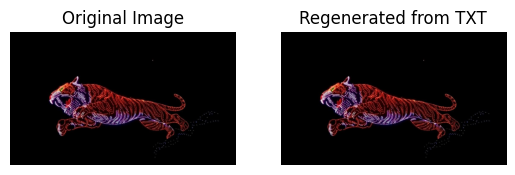

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load original image
image = cv2.imread("/content/photo_6275919244029529333_y.jpg")

# Check if the image was loaded successfully
if image is None:
    print("Error: Image not loaded. Please check the file path.")
else:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Save image array as text file
    np.savetxt("image_pixels.txt", image_rgb.reshape(-1, 3), fmt="%d")

    print("Pixel data saved to image_pixels.txt")

    # ---- Later: Read back from txt ----
    # Read pixel values
    pixels = np.loadtxt("image_pixels.txt", dtype=np.uint8)

    # Reshape back to original dimensions
    height, width, channels = image_rgb.shape
    print(height,width,channels)
    regenerated = pixels.reshape(height, width, channels)

    # Show original vs regenerated
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image_rgb)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Regenerated from TXT")
    plt.imshow(regenerated)
    plt.axis("off")

    plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


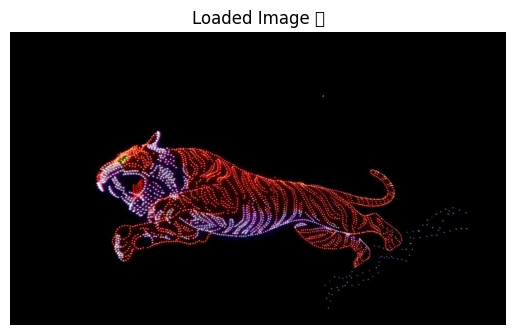

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "photo_6275919244029529333_y.jpg"  # Use the exact filename
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not loaded. Please check the file path.")
else:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis("off")
    plt.title("Loaded Image ✅")
    plt.show()


In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === 1️⃣ Load the image ===
image_path = "photo_6275919244029529333_y.jpg"  # Replace with your correct path
image = cv2.imread(image_path)

if image is None:
    print("❌ Error: Image not loaded. Check file path.")
else:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # === 2️⃣ Resize image to limit number of pixels ===
    target_points = 3000
    scale_factor = (target_points / (image_rgb.shape[0] * image_rgb.shape[1])) ** 0.5
    new_width = int(image_rgb.shape[1] * scale_factor)
    new_height = int(image_rgb.shape[0] * scale_factor)

    small_img = cv2.resize(image_rgb, (new_width, new_height))
    print(f"Resized to: {new_width} x {new_height} → {new_width * new_height} pixels (≈3000 drones)")

    # === 3️⃣ Convert pixels to coordinates + RGB ===
    rows, cols = np.indices((new_height, new_width))
    df = pd.DataFrame({
        "x": cols.flatten(),
        "y": rows.flatten(),
        "R": small_img[:, :, 0].flatten(),
        "G": small_img[:, :, 1].flatten(),
        "B": small_img[:, :, 2].flatten()
    })

    # === 4️⃣ Save to CSV ===
    csv_path = "tiger_drone_positions.csv"
    df.to_csv(csv_path, index=False)
    print(f"✅ Drone positions saved to {csv_path}")


Resized to: 71 x 42 → 2982 pixels (≈3000 drones)
✅ Drone positions saved to tiger_drone_positions.csv
